# 제품 이상여부 판별 프로젝트

## 1. 데이터 불러오기

### 필수 라이브러리

In [70]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [71]:
# 랜덤 스테이트 지정
RANDOM_STATE = 110

In [72]:
df_merged = pd.read_csv("data/df_merged.csv")

C:\Users\juneh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (26,116,165) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [73]:
df_merged.tail(7)

,Wip Line - Dam,Process Desc. - Dam,Equipment - Dam,Model.Suffix - Dam,Workorder - Dam,Set ID,Collect Date - Dam,Insp. Seq No. - Dam,Insp Judge Code - Dam,Collect Result - Dam,...,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2,target
40499,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002677,2024-04-28 18:22:11,1,OK,1000.0,...,50.0,91.8,270,50,114.612,19.2,15,427,1,Normal
40500,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002678,2024-04-28 18:23:13,1,OK,240.0,...,50.0,91.8,270,50,114.612,19.2,1,428,1,Normal
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002680,2024-04-28 18:25:20,1,OK,240.0,...,50.0,91.8,270,50,114.612,18.8,2,430,1,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002681,2024-04-28 18:26:27,1,OK,1000.0,...,50.0,91.8,270,50,114.612,19.0,9,431,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002682,2024-04-28 18:27:27,1,OK,240.0,...,50.0,91.8,270,50,114.612,19.3,3,432,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002684,2024-04-28 18:29:36,1,OK,240.0,...,50.0,91.8,270,50,114.612,19.6,4,434,1,Normal
40505,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002688,2024-04-28 18:33:51,1,OK,240.0,...,50.0,91.8,270,50,114.612,18.8,6,438,1,Normal


In [74]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 189 entries, Wip Line - Dam to target
dtypes: float64(72), int64(77), object(40)
memory usage: 58.4+ MB


In [75]:
# 각 변수의 null 비율을 계산합니다.
null_percentage = df_merged.isnull().sum() / df_merged.shape[0]

# null 비율이 0보다 큰 변수만 필터링합니다.
null_columns = null_percentage[null_percentage > 0]

# 결과 출력
print("null 값이 있는 변수의 null값 비율:")
print(null_columns)


null 값이 있는 변수의 null값 비율:
Collect Result.17 - Dam      0.315163
Collect Result.7 - Fill1     0.315163
Collect Result.17 - Fill2    0.315163
dtype: float64


In [76]:
df_merged['Collect Result.17 - Dam'].value_counts()

OK       11293
549       7271
162.4     3580
550.0     2398
550.3     1909
549.5     1263
548.5       26
Name: Collect Result.17 - Dam, dtype: int64

In [77]:
df_merged['Collect Result.7 - Fill1'].value_counts()

OK       11293
838.4     7658
837.9     4957
837.7     3577
838.2      253
837.5        2
Name: Collect Result.7 - Fill1, dtype: int64

In [78]:
df_merged['Collect Result.17 - Fill2'].value_counts()

835.5    12868
OK       11293
305.0     3579
Name: Collect Result.17 - Fill2, dtype: int64

In [79]:
df_merged.describe()

,Insp. Seq No. - Dam,Collect Result - Dam,Collect Result.1 - Dam,Collect Result.2 - Dam,Collect Result.3 - Dam,Collect Result.4 - Dam,Collect Result.5 - Dam,Collect Result.6 - Dam,Collect Result.7 - Dam,Collect Result.8 - Dam,...,Collect Result.30 - Fill2,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2
count,40506.0,40506.000000,40506.000000,40506.000000,40506.000000,40506.0,40506.0,40506.0,40506.000000,40506.0,...,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000
mean,1.0,530.370809,6.320669,-21.227966,73.864119,1150.0,33.5,0.0,743.449859,33.5,...,90.983336,66.972414,164.156081,180.671505,64.211351,62.048909,14.385928,73.539648,108.691453,0.771392
std,0.0,369.283055,4.858988,87.461776,9.761997,0.0,0.0,0.0,364.424068,0.0,...,33.885760,20.527895,87.513657,108.041552,17.188429,36.466634,7.261448,105.176311,130.758018,1.289203
min,1.0,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,...,50.000000,50.000000,91.800000,50.000000,50.000000,17.600000,1.000000,0.000000,0.000000,0.000000
25%,1.0,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,...,50.000000,50.000000,91.800000,50.000000,50.000000,19.600000,7.000000,7.000000,1.000000,0.000000
50%,1.0,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,...,119.000000,50.000000,91.800000,270.000000,50.000000,85.000000,19.500000,13.000000,49.000000,1.000000
75%,1.0,1000.000000,12.500000,90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,...,119.000000,91.800000,270.000000,270.000000,85.000000,85.000000,19.900000,120.000000,196.000000,1.000000
max,1.0,1000.000000,12.500000,90.000000,105.000000,1150.0,33.5,0.0,1030.000000,33.5,...,119.000000,91.800000,270.000000,270.000000,85.000000,284.100000,52.900000,487.000000,608.000000,17.000000


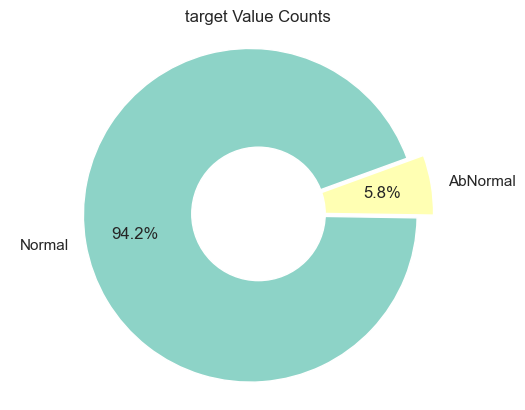

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Seaborn 스타일을 설정합니다.
sns.set(style="whitegrid")

# 'target' 컬럼의 값 비율을 계산합니다.
value_counts = df_merged['target'].value_counts(normalize=True)

# 도넛 차트를 그리기 위한 설정을 합니다.
fig, ax = plt.subplots()
ax.pie(value_counts, labels = value_counts.index, autopct='%1.1f%%', startangle=20, 
       colors=sns.color_palette("Set3"), pctdistance=0.7, explode = [0.05]*len(value_counts))

# 원형을 유지하도록 합니다.
plt.axis('equal')  

# 도넛 차트의 중앙에 하얀 원을 추가합니다.
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig.gca().add_artist(centre_circle)

# 차트 제목을 추가합니다.
plt.title('target Value Counts')

# 차트를 출력합니다.
plt.show()

In [81]:
df_merged['target']


0        AbNormal
1        AbNormal
2        AbNormal
3        AbNormal
4        AbNormal
           ...   
40501      Normal
40502      Normal
40503      Normal
40504      Normal
40505      Normal
Name: target, Length: 40506, dtype: object

In [82]:
normal_ratio = 1.0  # 1.0 means 1:1 ratio

df_normal = df_merged[df_merged["target"] == "Normal"]
df_abnormal = df_merged[df_merged["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(
    n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE
)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

  Total: Normal: 38156, AbNormal: 2350


target
AbNormal    2350
Normal      2350
dtype: int64

---

In [83]:
df_merged = df_concat

In [84]:
for col in df_merged.columns:
    counts = df_merged[col].value_counts()
    print(f"Value counts for column {col}:")
    print(counts)
    print()

Value counts for column Wip Line - Dam:
IVI-OB6    4700
Name: Wip Line - Dam, dtype: int64

Value counts for column Process Desc. - Dam:
Dam Dispenser    4700
Name: Process Desc. - Dam, dtype: int64

Value counts for column Equipment - Dam:
Dam dispenser #1    2929
Dam dispenser #2    1771
Name: Equipment - Dam, dtype: int64

Value counts for column Model.Suffix - Dam:
AJX75334501    3882
AJX75334502     416
AJX75334505     292
AJX75334503      49
AJX75334507      39
AJX75334506      17
AJX75334508       5
Name: Model.Suffix - Dam, dtype: int64

Value counts for column Workorder - Dam:
3HPXX066-0001    45
3G1XC632-1       35
3M1XH425-1       33
3F1X9644-1       31
3G1XC496-2       31
                 ..
4E1X9525-1        1
4E1XA028-1        1
3K1X9953-1        1
3M1XH422-3        1
4F1XB043-1        1
Name: Workorder - Dam, Length: 614, dtype: int64

Value counts for column Set ID:
OP753345054040002081    1
OP753345013070002132    1
OP753345013070002591    1
OP753345013070002354    1
O

In [85]:
# 각 변수의 null 비율을 계산합니다.
null_percentage = df_merged.isnull().sum() / df_merged.shape[0]

# null 비율이 0보다 큰 변수만 필터링합니다.
null_columns = null_percentage[null_percentage > 0]

# 결과 출력
print("null 값이 있는 변수의 null값 비율:")
print(null_columns)


null 값이 있는 변수의 null값 비율:
Collect Result.17 - Dam      0.298298
Collect Result.7 - Fill1     0.298298
Collect Result.17 - Fill2    0.298298
dtype: float64


In [86]:
df_merged[df_merged['Collect Result.17 - Dam']=='OK'].value_counts()

Wip Line - Dam  Process Desc. - Dam  Equipment - Dam   Model.Suffix - Dam  Workorder - Dam  Set ID                Collect Date - Dam   Insp. Seq No. - Dam  Insp Judge Code - Dam  Collect Result - Dam  Collect Result.1 - Dam  Collect Result.2 - Dam  Collect Result.3 - Dam  Collect Result.4 - Dam  Collect Result.5 - Dam  Collect Result.6 - Dam  Collect Result.7 - Dam  Collect Result.8 - Dam  Collect Result.9 - Dam  Collect Result.10 - Dam  Collect Result.11 - Dam  Collect Result.12 - Dam  Collect Result.13 - Dam  Collect Result.14 - Dam  Collect Result.15 - Dam  Collect Result.16 - Dam  Collect Result.17 - Dam  Collect Result.18 - Dam  Collect Result.19 - Dam  Collect Result.20 - Dam  Collect Result.21 - Dam  Collect Result.22 - Dam  Collect Result.23 - Dam  Collect Result.24 - Dam  Collect Result.25 - Dam  Collect Result.26 - Dam  Collect Result.27 - Dam  Collect Result.28 - Dam  Collect Result.29 - Dam  Collect Result.30 - Dam  Collect Result.31 - Dam  Collect Result.32 - Dam  Collect 

In [87]:
dam_ok = df_merged[df_merged['Collect Result.17 - Dam'] == 'OK']
dam_ok['target'].value_counts(normalize=True)

Normal      0.575342
AbNormal    0.424658
Name: target, dtype: float64

In [88]:
fill1_ok = df_merged[df_merged['Collect Result.7 - Fill1'] == 'OK']
fill1_ok['target'].value_counts(normalize=True)

Normal      0.575342
AbNormal    0.424658
Name: target, dtype: float64

In [89]:
fill2_ok = df_merged[df_merged['Collect Result.17 - Fill2'] == 'OK']
fill2_ok['target'].value_counts(normalize=True)

Normal      0.575342
AbNormal    0.424658
Name: target, dtype: float64

In [90]:
df_merged['Collect Result.17 - Dam'].value_counts()

OK       1168
549.0    1079
162.4     433
550.0     253
549.5     182
550.3     178
548.5       5
Name: Collect Result.17 - Dam, dtype: int64

In [91]:
# 결측값 'unknown' 값으로 대체
df_merged['Collect Result.17 - Dam'].fillna('unknown', inplace=True)
df_merged['Collect Result.7 - Fill1'].fillna('unknown', inplace=True)
df_merged['Collect Result.17 - Fill2'].fillna('unknown', inplace=True)

In [93]:
print(df_merged['Collect Result.17 - Dam'].isnull().sum())
print(df_merged['Collect Result.7 - Fill1'].isnull().sum())
print(df_merged['Collect Result.17 - Fill2'].isnull().sum())

0
0
0


In [97]:
dam_ok = df_merged[df_merged['Collect Result.17 - Dam'] == 'unknown']
dam_ok['target'].value_counts(normalize=True)

Normal      0.537803
AbNormal    0.462197
Name: target, dtype: float64

In [98]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Columns: 189 entries, Wip Line - Dam to target
dtypes: float64(72), int64(77), object(40)
memory usage: 6.8+ MB


In [99]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE


# Separate features and target
X = df_merged.drop("target", axis=1)
y = df_merged["target"]

# Identify categorical features and convert them to strings
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].astype(str)

# Apply one-hot encoding to categorical features
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = one_hot_encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate encoded columns
X = X.drop(categorical_features, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=RANDOM_STATE)
X_smote, y_smote = smote.fit_resample(X, y)

# Combine features and target back into a DataFrame
df_smote = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.Series(y_smote, name='target')], axis=1)

# Print the value counts of the target to see the balance
print(df_smote["target"].value_counts())

# If needed, shuffle the DataFrame
df_smote = df_smote.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)


Normal      2350
AbNormal    2350
Name: target, dtype: int64


## 3. 모델 학습

### 모델 정의 

In [9]:
model = RandomForestClassifier(random_state=RANDOM_STATE)

### 모델 학습

In [10]:
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

if "Set ID" in features:
    features.remove("Set ID")

train_x = df_train[features]
train_y = df_train["target"]

model.fit(train_x, train_y)

RandomForestClassifier(random_state=110)

## 4. 제출하기

### 테스트 데이터 예측

테스트 데이터 불러오기

In [11]:
df_test_y = pd.read_csv(os.path.join("submission.csv"))

In [12]:
df_test = pd.merge(X, df_test_y, "inner", on="Set ID")
df_test_x = df_test[features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
test_pred = model.predict(df_test_x)
test_pred

array(['AbNormal', 'AbNormal', 'AbNormal', ..., 'Normal', 'AbNormal',
       'AbNormal'], dtype=object)

### 제출 파일 작성

In [14]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**